In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# FEATURES AND DEPENDENCIES
dependencies = {
    "1. Season": [],
    "2. Precipitation": [],
    "3. River level": ["Soil moisture", "Precipitation", "Flood depth", "Impervious surface area"],
    "4. Urban/rural": [],
    "5. Mean property value": [],
    "6. Building age": [],
    "7. Holiday flag": [],
    "8. Population density": ["Urban/rural"],
    "9. Emergency response time": ["Precipitation", "Population density"],
    "10. Ambulance handover time": ["Season"],
    "11. Hospital bed availability": ["Season"],
    "12. English proficiency": [],
    "13. Vehicle rate": [],
    "14. Water density": [],
    "15. Watercourse distance": [],
    "16. Elevation": [],
    "17. Impervious surface area": [],
    "18. Historic flood flag": [],
    "19. Road density": [],
    "20. Main road distance": [],
    "21. Hospital distance": [],
    "22. Soil moisture": ["Season", "Precipitation", "Flood depth", "Impervious surface area"],
    "23. Flood depth": ["Precipitation", "River level", "Watercourse distance"],
    "24. Depth damage": ["Flood depth"],
    "25. Age": [],
    "26. Highest level of qualification": [],
    "27. Accomodation type": [],
    "28. Household size": [],
    "29. Economic activity status": ["Age"],
    "30. NS-SeC": ["Age", "Economic activity status"],
    "31. Mean income": [],
    "32. Low income flag": ["Mean income"],
    "33. Adults employed in household": ["Household size"],
    "34. Disabled people in household": ["Household size"],
    "35. People with long-term health in household": ["Household size"],
    "36. Deprived in education": ["Highest level of qualification"],
    "37. Deprived in employment": ["Adults employed in household", "NS-SeC"],
    "38. Deprived in health and disability": ["People with long-term health in household", "Disabled people in household"],
    "39. People per room in household": ["Household size"],
    "40. Occupancy rating for rooms": ["People per room in household"],
    "41. Deprived in housing": ["People per room in household", "Occupancy rating for rooms"],
    "42. Household deprivation": ["Deprived in education", "Deprived in employment", "Deprived in health and disability", "Deprived in housing"],
    "43. Tenure of household": [],
    "44. Internet flag": ["Age", "Household size"],
    "45. Home insurance flag": [],
    "46. Health insurance flag": [],
    "47. Household": ["Tenure of household", "Accomodation type", "Household size", "Internet flag", "Household deprivation", "Low income flag", "Home insurance flag", "Health insurance flag"],
    "48. Home insurance rate": [],
    "49. Mean income of households": ["Mean income"],
    "50. Disability rate": [],
    "51. General health rate": [],
    "52. Elderly rate": ["Age"],
    "53. Children rate": ["Age"],
    "54. Physical vulnerability": ["Elevation", "Impervious surface area", "Watercourse distance", "Water density", "Road density", "Main road distance", "Building age"],
    "55. Socioeconomic vulnerability": ["Elderly rate", "Disability rate", "Children rate", "General health rate", "English proficiency", "Household", "Mean property value"],
    "56. Preparedness": ["Emergency response time", "Ambulance handover time", "Hospital bed availability", "Vehicle rate", "Hospital distance", "Warning issued"],
    "57. Recovery capacity": ["Mean income of households", "Home insurance rate"],
    "58. Exposure": ["Historic flood flag", "Holiday flag", "Population density"],
    "59. Warning issued": [],
    "60. Impact score": ["Exposure", "Physical vulnerability", "Depth damage", "Socioeconomic vulnerability", "Preparedness", "Recovery capacity"],
}


In [3]:
def remove_num(feature):
    return feature.split(". ", 1)[-1]

name_to_node = {remove_num(node): node for node in dependencies.keys()}

# DIRECTED GRAPH
G = nx.DiGraph()
G.add_nodes_from(dependencies.keys())
for node, deps in dependencies.items():
    for dep in deps:
        dep_node = name_to_node[dep]
        G.add_edge(dep_node, node)

In [4]:
# COLOUR CODING

cmap = plt.cm.Set3
color_map = []
default_color = "lightgrey"
for node in G.nodes():
    clean_node = remove_num(node)
    if clean_node == "Impact score":
        color_map.append(cmap(0))
    elif clean_node in dependencies["60. Impact score"]:
        color_map.append(cmap(1))
    elif clean_node in dependencies["54. Physical vulnerability"]:
        color_map.append(cmap(2))
    elif clean_node in dependencies["55. Socioeconomic vulnerability"]:
        color_map.append(cmap(3)) 
    elif clean_node in dependencies["56. Preparedness"]:
        color_map.append(cmap(4)) 
    elif clean_node in dependencies["57. Recovery capacity"]:
        color_map.append(cmap(5)) 
    elif clean_node in dependencies["58. Exposure"]:
        color_map.append(cmap(6)) 
    elif clean_node in dependencies["47. Household"]:
        color_map.append(cmap(7))
    else:
        color_map.append(default_color)


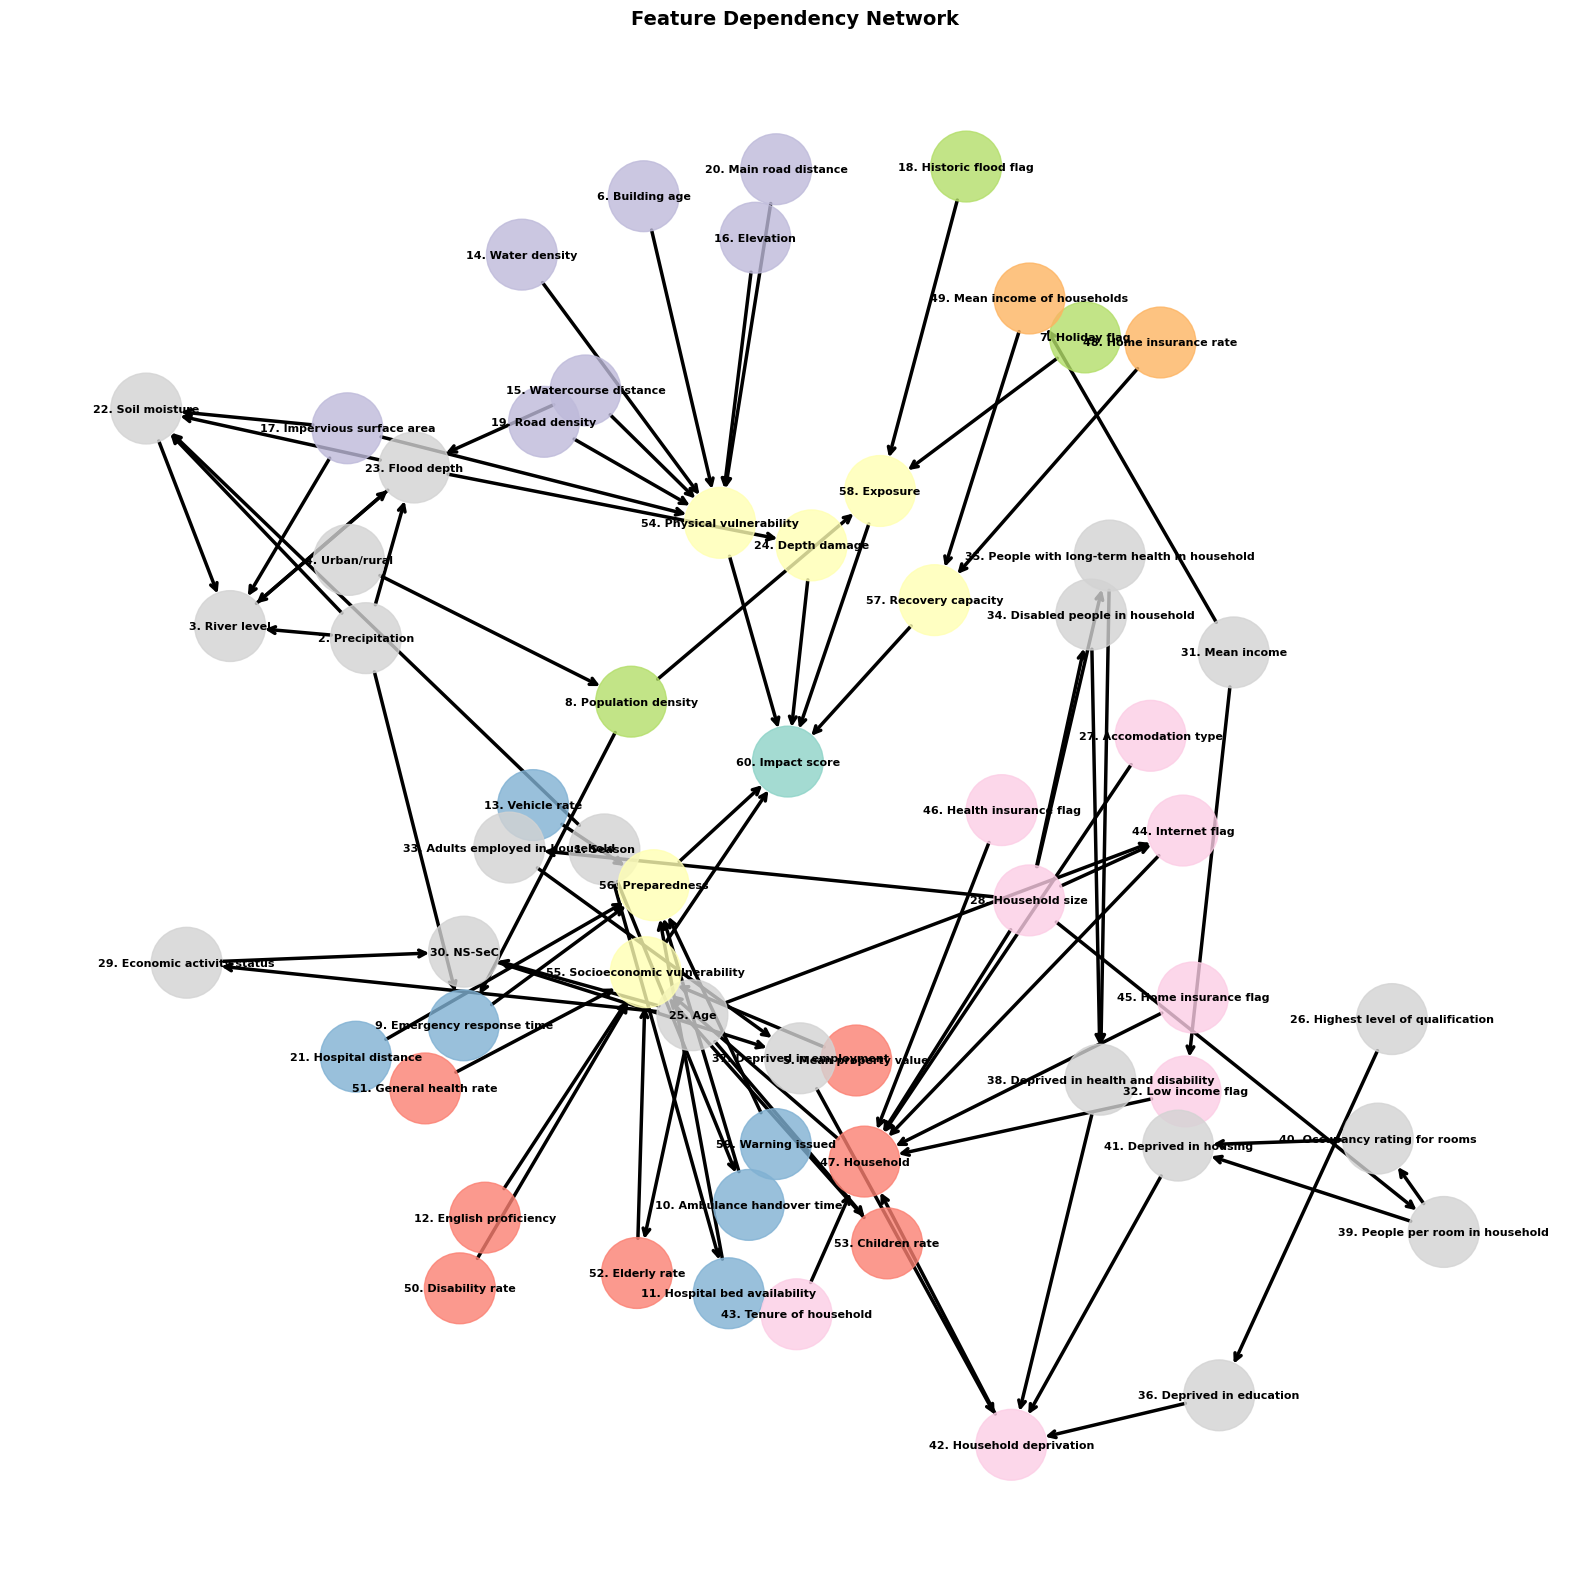

In [5]:
#pos = nx.spring_layout(G) # other options: circular_layout, shell_layout, kamada_kawai

# Draw the graph
#nx.draw(G, pos, with_labels=True, node_size=800, font_size=10)

'''shells = [
    ["60. Impact score"],
    dependencies['60. Impact score'],
    [n for n in G.nodes() if n != "60. Impact score" and n not in dependencies['60. Impact score']],
]
pos = nx.shell_layout(G, nlist=shells)'''

rest = [n for n in G.nodes() if n not in ["60. Impact score"]+dependencies['60. Impact score']]
shell_pos = nx.shell_layout(G, nlist=[["60. Impact score"], dependencies['60. Impact score']])

pos = nx.spring_layout(
    G,
    pos=shell_pos,     # initial positions include the fixed shell positions
    k=0.2,
    seed=42,
    fixed=["60. Impact score"]+dependencies['60. Impact score']  # these nodes will not move
)

# DRAW
plt.figure(figsize=(16, 16))
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=2600, alpha=0.80)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=12, edge_color="k", width=2.5,min_source_margin=25,min_target_margin=25)

plt.title("Feature Dependency Network", fontsize=14, fontweight="bold")
plt.axis("off")
plt.tight_layout()
#plt.savefig("dependency_network.png")
plt.show()
